In [1]:
import torch
from common.networks import VariationalAutoEncoder
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


c:\Users\Salim\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [2]:
lr=3e-4
batch_size=64
num_epoch = 1

mnist_data = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(mnist_data.data.reshape(-1,784).float()/255, batch_size=batch_size, shuffle=True)


In [3]:
# Initialize model, optimizer, loss
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = VariationalAutoEncoder(input_dim=784, z_dim=10, device=device).to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=lr)
loss_fn = torch.nn.BCELoss(reduction="sum")
# Run training
vae.train(num_epoch, optimizer, loss_fn, train_loader)

4it [00:00, 14.48it/s, loss=3.68e+4]

938it [00:31, 29.86it/s, loss=5.92e+3]


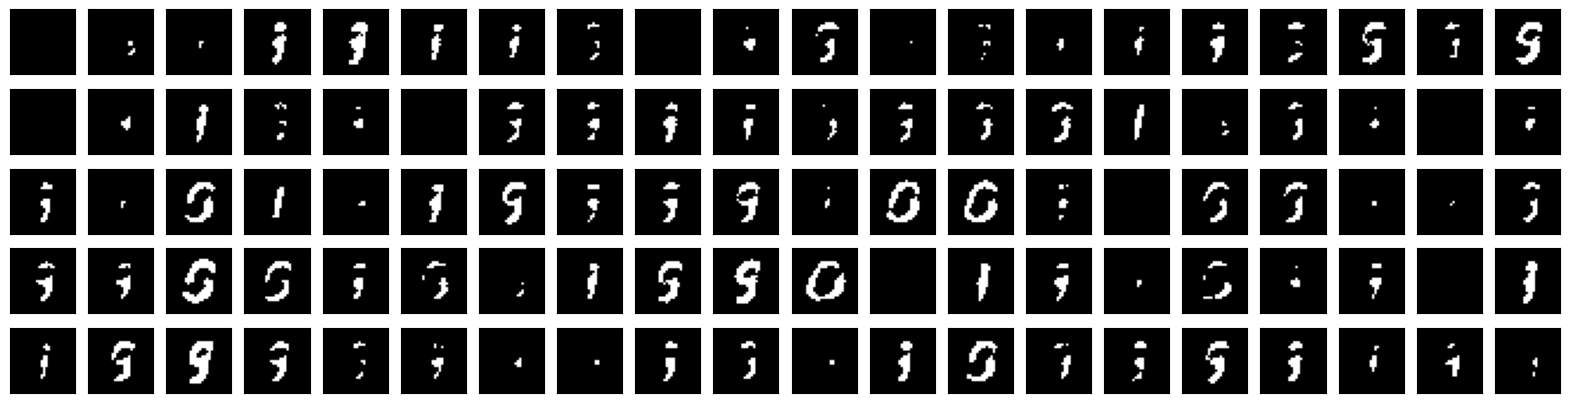

In [6]:
gen_vae = vae.generate_images(num_samples=100) # we generate 100 samples and perform 100 gibbs sampling
plt.figure(figsize=(20,5))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(gen_vae[i].detach().cpu().numpy().reshape(28,28),cmap='gray')
    plt.xticks([])
    plt.yticks([])